In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("C:/Users/ksoum/Downloads/titanic/test.csv")


In [21]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [27]:
df.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,2.27,30.27,0.45,0.39,35.63
std,120.81,0.84,14.18,0.90,0.98,55.91
min,892.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,1.00,21.00,0.00,0.00,7.90
50%,1100.50,3.00,27.00,0.00,0.00,14.45
75%,1204.75,3.00,39.00,1.00,0.00,31.50
max,1309.00,3.00,76.00,8.00,9.00,512.33


In [29]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
# Age imputation using group-based median
df['Age_filled'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

# Fare imputation for missing values
df['Fare_filled'] = df['Fare'].fillna(
    df.groupby(['Pclass', 'Embarked'])['Fare'].transform('median')
)

# Cabin feature engineering
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df['Cabin_Deck'] = df['Cabin'].str[0].fillna('Unknown')


In [37]:
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled,Fare_filled,Has_Cabin,Cabin_Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,7.8292,0,Unknown
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,7.0000,0,Unknown
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,9.6875,0,Unknown
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,8.6625,0,Unknown
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,12.2875,0,Unknown


In [41]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Age_filled       0
Fare_filled      0
Has_Cabin        0
Cabin_Deck       0
dtype: int64

In [47]:
# Extract titles
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Create family features
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Family_Type'] = pd.cut(df['Family_Size'], bins=[0, 1, 4, float('inf')], labels=['Single', 'Small', 'Large'])

# Create age groups and fare bins
df['Age_Group'] = pd.cut(df['Age_filled'], bins=[0, 12, 18, 35, 60, float('inf')], 
                        labels=['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior'])
df['Fare_Bin'] = pd.qcut(df['Fare_filled'], q=4, labels=['Low', 'Medium', 'High', 'Very_High'])


In [51]:
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled,Fare_filled,Has_Cabin,Cabin_Deck,Title,Family_Size,Family_Type,Age_Group,Fare_Bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,7.8292,0,Unknown,Mr,1,Single,Adult,Low
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,7.0000,0,Unknown,Mrs,2,Small,Middle_Aged,Low
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,9.6875,0,Unknown,Mr,1,Single,Senior,Medium
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,8.6625,0,Unknown,Mr,1,Single,Adult,Medium
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,12.2875,0,Unknown,Mrs,3,Small,Adult,Medium


In [53]:
# MUST CREATE correlation_matrix BEFORE using it!
numerical_vars = ['Age_filled', 'SibSp', 'Parch', 'Fare_filled', 'Family_Size', 'Has_Cabin']
correlation_matrix = df[numerical_vars].corr()
print("Correlation matrix ready!")


Correlation matrix ready!


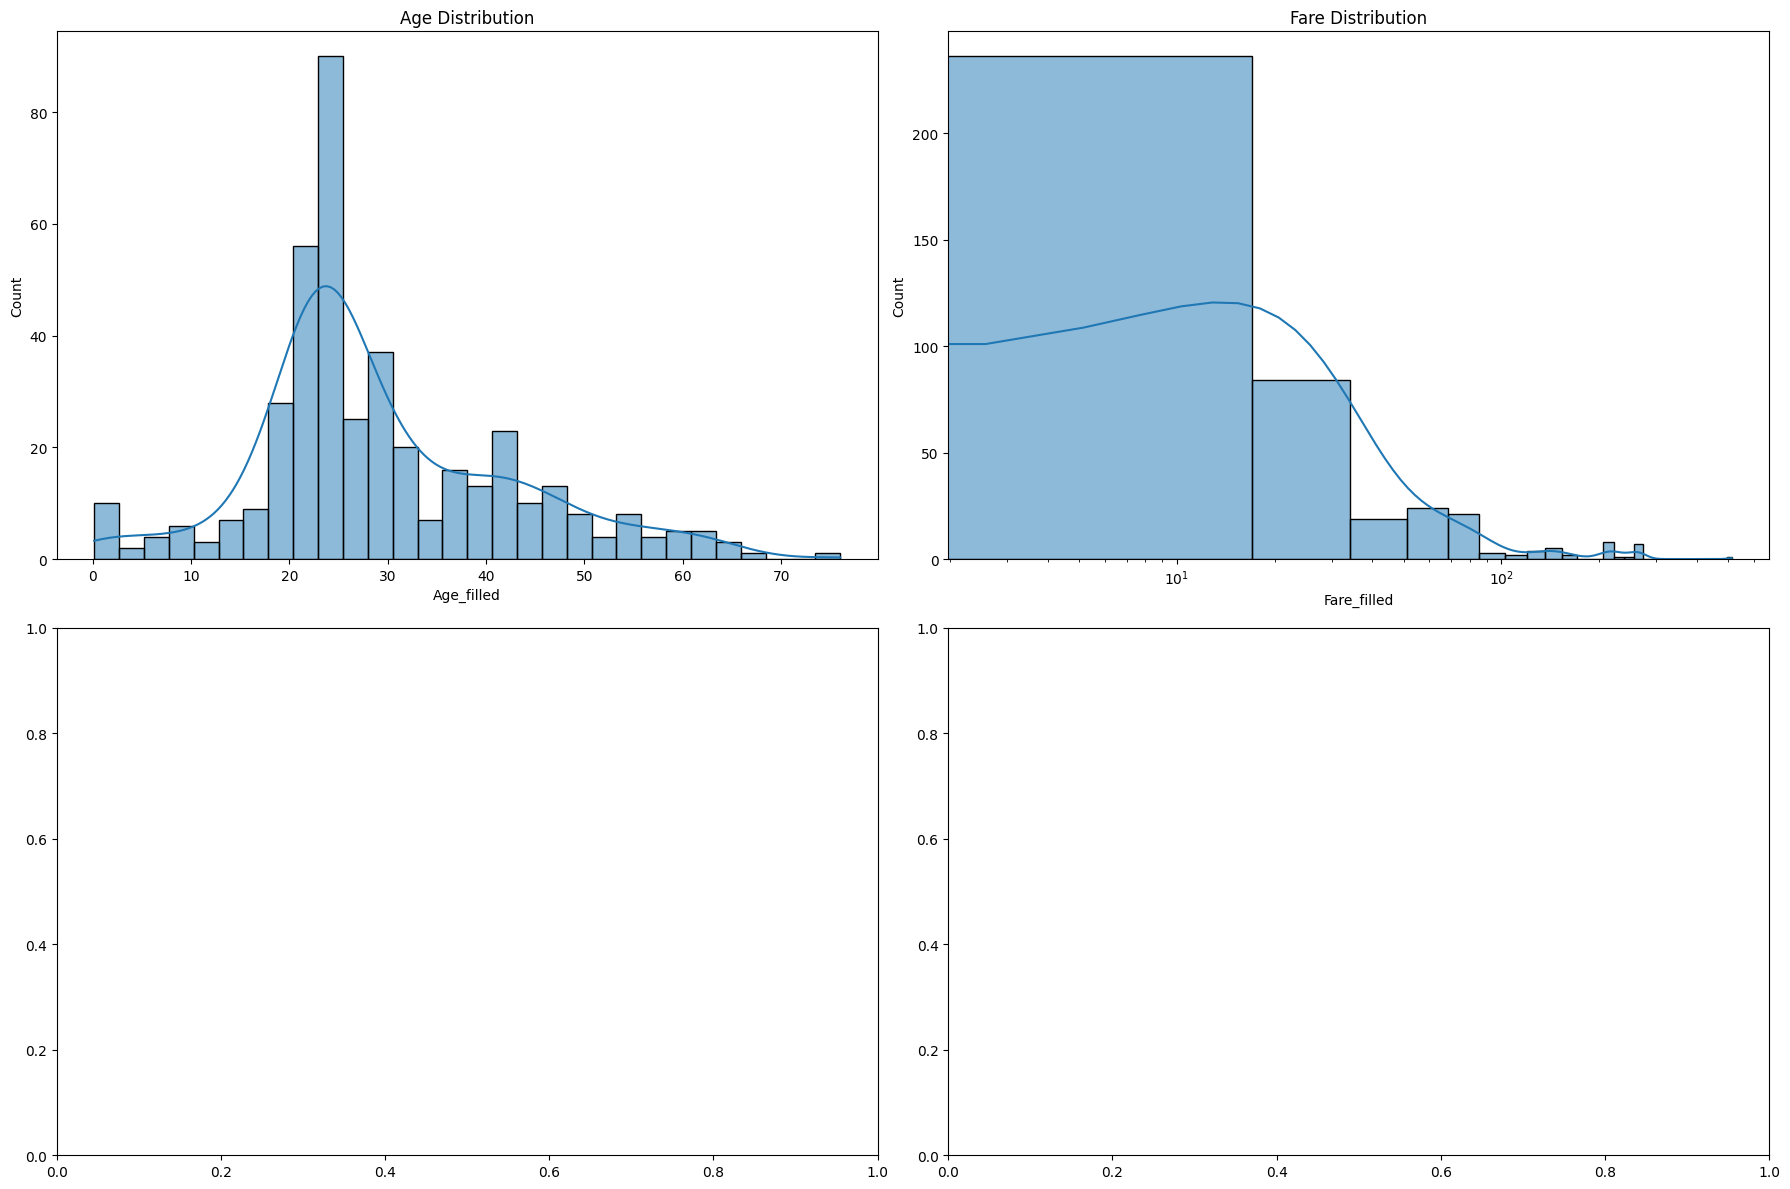

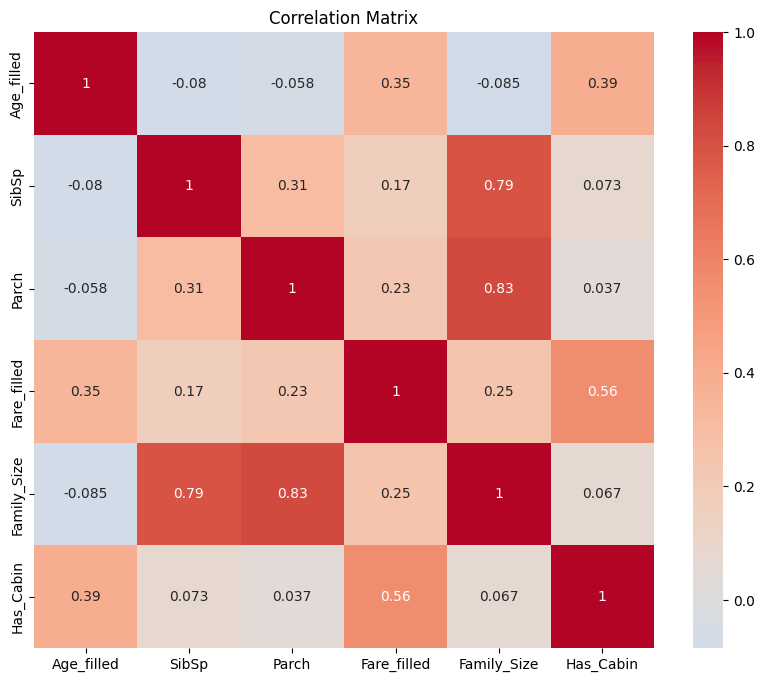

Fare_Bin     Low  Medium  High  Very_High
Age_Group                                
Child          1       5    14          5
Teen           7       9     3         10
Adult         94      69    52         35
Middle_Aged   12      11    31         49
Senior         0       3     2          6


In [65]:
# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.histplot(data=df, x='Age_filled', bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

sns.histplot(data=df, x='Fare_filled', bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_xscale('log')
axes[0,1].set_title('Fare Distribution')

# Add other plots...
plt.tight_layout()
plt.show()

# Correlation heatmap - NOW THIS WORKS!
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Cross-tabulation - NOW THIS WORKS!
age_fare_crosstab = pd.crosstab(df['Age_Group'], df['Fare_Bin'])
print(age_fare_crosstab)
